In [1]:
#this uses iPython magic to make plots appear inline
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import sys
import numpy as np
import matplotlib.patches as patches
import glob
import seaborn as sns
import gzip

def count_lines(f):
    lineCount = 0
    with open(f, 'r') as f:
        for line in f:
            lineCount += 1
        return lineCount
def runCMD(cmd):
    val = subprocess.Popen(cmd, shell=True).wait()
    if val == 0:
        pass
    else:
        print ('command failed')
        print (cmd)
        sys.exit(1)

In [2]:
inDir = '/home/ampend/links/kidd-lab/ampend-projects/Angela/XP-CLR/'

In [3]:
def calc_maf(inFile):
    SNPCount = 0
    for line in inFile:
        line=line.rstrip().split('\t')
        if '#' in line[0]:
            continue
        SNPCount += 1
        genoCount,minorCount  = 0, 0
        for col in range(9,len(line)): 
            info = line[col].split(':')
            genotypePair = [info[0].split('/')]
            if '.' in info[0]:
                continue
            else:
                genoCount += 1
            if '0/0' == info[0]:
                continue
            if '0/1' == info[0]:
                minorCount += 1
            if '1/1' == info[0]:
                minorCount += 2
        MAF = minorCount/float(genoCount*2)
        villageMACount.append(minorCount)
        villageMAF.append(MAF)

    print('Processed %i SNPs' % SNPCount)
    return villageMAF,villageMACount

In [4]:
#For village dogs --- REAL SNP SET
villageVCF = open(inDir + 'input/' + 'village_autos-X.snp.indel5.autoPar.vqsr99.FILTERED_biallelic.recode.vcf', 'r')
#Calculating the MAF
villageMAF,villageMACount = [], []
villageMAF,villageMACount = calc_maf(villageVCF)
villageVCF.close()
#Writing to outfile
villageMAFFile = open('/home/ampend/links/kidd-lab/ampend-projects/Angela/XP-CLR/input/' + 'VillageMAF__autos-X.snp.indel5.autoPar.vqsr99.FILTERED_biallelic_mxb_rm.recode.txt','w')
villageMACountFile = open('/home/ampend/links/kidd-lab/ampend-projects/Angela/XP-CLR/input/' + 'VillageMACount__autos-X.snp.indel5.autoPar.vqsr99.FILTERED_biallelic_mxb_rm.recode.txt','w')
for i in range(0,len(villageMAF)):
    villageMAFFile.write(str(villageMAF[i]) + '\n')
    villageMACountFile.write(str(villageMACount[i]) + '\n')
villageMAFFile.close()
villageMACountFile.close()


Processed 7262718 SNPs


In [5]:
wolfVCF = open(inDir + 'input/' + 'wolves_autos-X.snp.indel5.autoPar.vqsr99.FILTERED_biallelic_mxb_rm.recode.vcf', 'r')
#Calculating MAF 
wolfMAF,wolfMACount = [],[]
wolfMAF,wolfMACount = calc_maf(wolfVCF)
wolfVCF.close()
#Writing outfile
wolfMAFFile = open('/home/ampend/links/kidd-lab/ampend-projects/Angela/XP-CLR/input/' + 'WolvesMAF__autos-X.snp.indel5.autoPar.vqsr99.FILTERED_biallelic_mxb_rm.recode.txt','w')
wolfMACountFile = open('/home/ampend/links/kidd-lab/ampend-projects/Angela/XP-CLR/input/' + 'WolvesMACount__autos-X.snp.indel5.autoPar.vqsr99.FILTERED_biallelic_mxb_rm.recode.txt','w')
for i in range(0,len(villageMAF)):
    wolfMAFFile.write(str(wolfMAF[i]) + '\n')
    wolfMACountFile.write(str(wolfMACount[i]) + '\n')
wolfMAFFile.close()
wolfMACountFile.close()

Processed 7262718 SNPs


############################################################
############################################################
############################################################
############################################################
############################################################

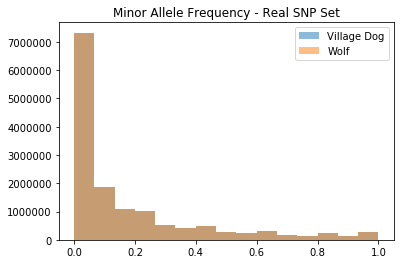

In [9]:
_ = plt.hist(villageMAF,bins=15,alpha=0.5,label='Village Dog')
_ = plt.hist(wolfMAF,bins=15,alpha=0.5,label='Wolf')
plt.title('Minor Allele Frequency - Real SNP Set')
plt.legend()
plt.show()

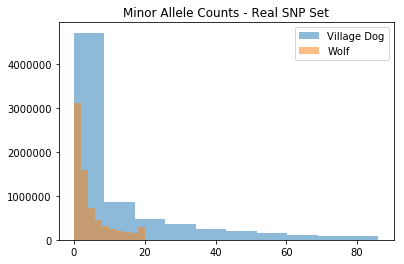

In [29]:
_ = plt.hist(villageMACount,alpha=0.5,label='Village Dog')
_ = plt.hist(wolfMACount,alpha=0.5,label='Wolf')
plt.title('Minor Allele Counts - Real SNP Set')
plt.legend()
plt.show()

############################################################
############################################################
############################################################
############################################################
############################################################

In [8]:
import gzip
import os.path
from pathlib import Path



In [5]:
def calc_maf_simulations(inFile):
    SNPCount = 0
    villageMAF, villageMACount = [], [] #array of (1) minor allele frequencies, and (2) minor allele counts
    wolfMAF, wolfMACount = [], [] #array of (1) minor allele frequencies, and (2) minor allele counts
    for line in gzip.open(inFile,'rb'):
        line=line.decode() #splits a byte formatted line (FROM THE GZIP FILE FORMAT)
        line=line.rstrip().split('\t')
        if '#' in line[0]:
            continue
        SNPCount += 1
        #DOGS
        dog_genoCount,dog_minorCount  = dog_geno_counts(line)
        MAF = dog_minorCount/float(dog_genoCount*2)
        villageMACount.append(dog_minorCount)
        villageMAF.append(MAF)        
        #WOLVES
        wolf_genoCount,wolf_minorCount  = wolf_geno_counts(line)
        MAF = wolf_minorCount/float(wolf_genoCount*2)
        wolfMACount.append(wolf_minorCount)
        wolfMAF.append(MAF)   


    print('Processed %i SNPs' % SNPCount)
    return villageMAF,villageMACount,wolfMAF, wolfMACount
####################################################################################################
def dog_geno_counts(line):
    #For dogs
    genotypeCount,minorCount = 0,0
    for col in range(9,len(line)-9): 
        info = line[col].split(':')
        if '.' in info[0]: #dont count the ones without genotypes
            continue
        else:
            genotypeCount += 1
        if '0/0' == info[0]:
            continue
        if '0/1' == info[0]:
            minorCount += 1
        if '1/1' == info[0]:
            minorCount += 2
    return genotypeCount,minorCount
####################################################################################################
def wolf_geno_counts(line):
    #For wolves
    genotypeCount,minorCount = 0,0
    for col in range(len(line)-9,len(line)): 
        info = line[col].split(':')
        if '.' in info[0]: #dont count the ones without genotypes
            continue
        else:
            genotypeCount += 1
        if '0/0' == info[0]:
            continue
        if '0/1' == info[0]:
            minorCount += 1
        if '1/1' == info[0]:
            minorCount += 2
    return genotypeCount,minorCount

In [6]:
simDir = '/home/ampend/links/kidd-lab/jmkidd-projects/dogs/selection-scan/fst-simulations/msprime-outputs/'
myDir = '/home/ampend/links/kidd-lab/ampend-projects/Angela/Simulations/input/MAF/'

In [ ]:
for chrom in range(1,39): #go through chromosomes 1-39
    print('#chr%s' % str(chrom))
    #for i in range(0,10): #to go through the ten simulations
    for i in range(10,21): #to go through the ten simulations
        print('Simulation = #%i' % i)
        fileName = simDir + 'chr%s.%s.simulation.out.gz' % (chrom,i) #simulation out file
        
        my_file = Path(fileName)
        if my_file.is_file(): #Will only process if the file exists
            villageMAF,villageMACount,wolfMAF, wolfMACount = calc_maf_simulations(fileName)
            #Save these results to the total arrays to keep track for plotting later
            outFile = open(myDir + 'chr%s.%s.simulation_MAF' % (chrom,i),'w')
            for i in range(0,len(villageMAF)):
                outFile.write('%s\t%s\t%s\t%s\n' % (villageMAF[i],villageMACount[i],wolfMAF[i],wolfMACount[i]))
        else:
            continue